# Actividad Final
### Mario Guerra Gualy

Como parte del encuentro final, se trabajara con del dataset de ventas, este está compuesto de dos archivos, el primero es Orders, que contiene:
- Id orden
- fecha orden
- nombre cliente
- estado
- ciudad

El segundo archivo es Details que contiene:
- Id orden
- Importe
- Ganancia
- Cantidad
- Categoria
- Subcategoria
- Pago

La idea del ejercicio realizar el Análisis exploratorio de los datos, para poder determidad la calidad de ellos, y mostrar por medio de graficos algun comportamiento de estos.

### Importación librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
pd.set_option('display.max_columns', None)

### Cargue archivos

In [2]:
dforders=pd.read_csv("ARCHIVOS/Online_sales/Orders.csv", sep=",")
dforders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [3]:
dfdetails=pd.read_csv("ARCHIVOS/Online_sales/Details.csv", sep=",")
dfdetails.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


### Revisión Orders

In [4]:
dforders.shape

(500, 5)

In [5]:
dforders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


Se observa que este conjunto de datos no tiene valores nulos sin embargo validemos los tipos de datos y los diferentes categorias de cada variable

In [6]:
#vamos a buscar valores duplicados en el df
dforders.duplicated().sum()

0

In [7]:
dforders['CustomerName'].value_counts()      

CustomerName
Shreya      6
Shubham     5
Rohan       4
Yogesh      4
Sheetal     4
           ..
Harshita    1
Brijesh     1
Kiran       1
Navdeep     1
Ashwin      1
Name: count, Length: 336, dtype: int64

In [8]:
dforders.State.value_counts()         

State
Maharashtra          94
Madhya Pradesh       93
Rajasthan            32
Gujarat              27
Uttar Pradesh        25
Punjab               25
Delhi                24
West Bengal          22
Karnataka            20
Kerala               16
Bihar                16
Nagaland             15
Andhra Pradesh       15
Haryana              14
Himachal Pradesh     14
Jammu and Kashmir    14
Goa                  14
Sikkim               12
Tamil Nadu            8
Name: count, dtype: int64

In [9]:
dforders.City.value_counts()    

City
Indore                71
Mumbai                67
Chandigarh            30
Pune                  27
Delhi                 24
Bhopal                22
Kolkata               22
Bangalore             20
Jaipur                19
Ahmedabad             17
Thiruvananthapuram    16
Patna                 16
Hyderabad             15
Kohima                15
Simla                 14
Goa                   14
Kashmir               14
Udaipur               13
Lucknow               13
Gangtok               12
Surat                 10
Amritsar               9
Chennai                8
Prayagraj              6
Mathura                6
Name: count, dtype: int64

In [10]:
dforders['Order Date'] = pd.to_datetime(dforders['Order Date'],dayfirst=True)
dforders['Order ID']= dforders['Order ID'].str.strip().str.upper()
dforders['CustomerName']= dforders['CustomerName'].str.strip().str.upper()
dforders['State']= dforders['State'].str.strip().str.upper()
dforders['City']= dforders['City'].str.strip().str.upper()
dforders['Year'] = dforders['Order Date'].dt.year
dforders['Month'] = dforders['Order Date'].dt.month
dforders


,Order ID,Order Date,CustomerName,State,City,Year,Month
0,B-26055,2018-03-10,HARIVANSH,UTTAR PRADESH,MATHURA,2018,3
1,B-25993,2018-02-03,MADHAV,DELHI,DELHI,2018,2
2,B-25973,2018-01-24,MADAN MOHAN,UTTAR PRADESH,MATHURA,2018,1
3,B-25923,2018-12-27,GOPAL,MAHARASHTRA,MUMBAI,2018,12
4,B-25757,2018-08-21,VISHAKHA,MADHYA PRADESH,INDORE,2018,8
...,...,...,...,...,...,...,...
495,B-25742,2018-08-03,ASHWIN,GOA,GOA,2018,8
496,B-26088,2018-03-26,BHAVNA,SIKKIM,GANGTOK,2018,3
497,B-25707,2018-07-01,SHIVANI,MAHARASHTRA,MUMBAI,2018,7
498,B-25758,2018-08-22,SHUBHAM,HIMACHAL PRADESH,SIMLA,2018,8


### Graficos

validemos de el estado que mas tiene ordenes, cual es su ciudad mas representativa 

In [11]:
dfordersMaharashtra= dforders[dforders['State']=='MAHARASHTRA']


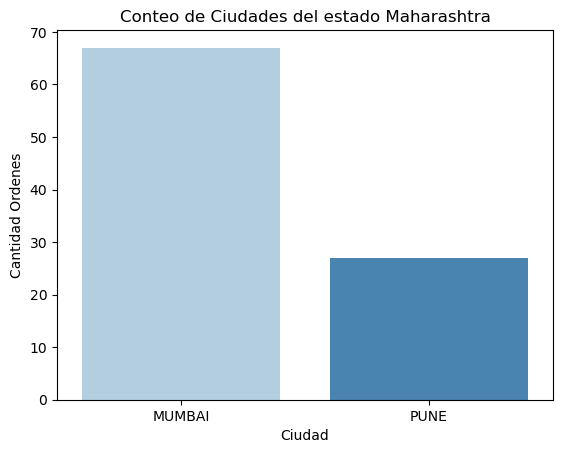

In [12]:
# Crear el gráfico de barras con seaborn
sns.countplot(x='City', data=dfordersMaharashtra,palette='Blues', hue='City')

# Agregar títulos y etiquetas
plt.title('Conteo de Ciudades del estado Maharashtra')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad Ordenes')

# Mostrar el gráfico
plt.show()

Veamos el comportamiento por la fecha

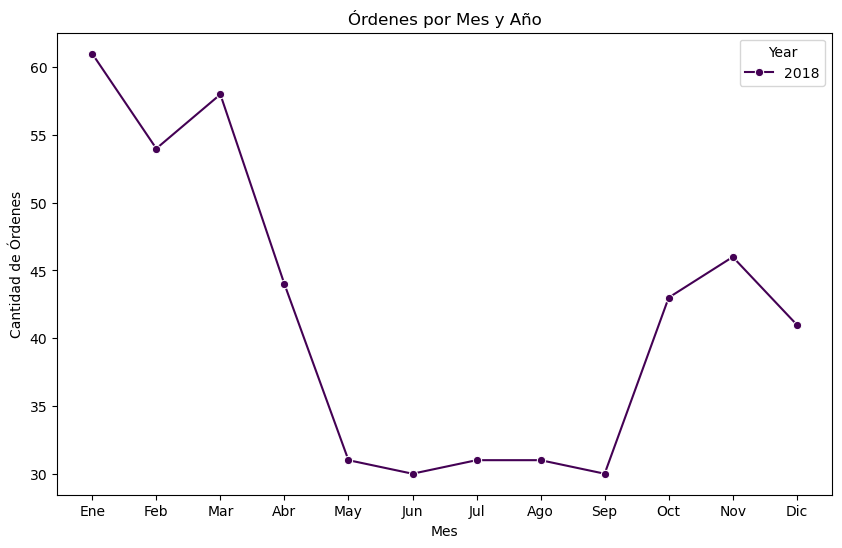

In [13]:
# Agrupar por año y mes y contar el número de órdenes
ordenes_por_mes_año = dforders.groupby(['Year', 'Month']).size().reset_index(name='Order Count')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Order Count', hue='Year', data=ordenes_por_mes_año, marker='o',palette='viridis')

# Agregar títulos y etiquetas
plt.title('Órdenes por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Órdenes')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()


Vemos que a inicio de año hay una alta afluencia de pedidos, pero a mitad de año se el bajon impresionante, hasta que en septiembre comienza a aumentar

### Revisión Details

In [14]:
dfdetails.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [15]:
dfdetails.shape

(1500, 7)

In [16]:
dfdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB


Se observa que los datos no vienen con nulos, sin embargo vamos a revisar cada variable

In [17]:
#vamos a buscar valores duplicados en el df
dfdetails.duplicated().sum()

0

In [18]:
dfdetails['Category'].value_counts()

Category
Clothing       949
Electronics    308
Furniture      243
Name: count, dtype: int64

In [19]:
dfdetails['Sub-Category'].value_counts()

Sub-Category
Saree               211
Hankerchief         197
Stole               192
Phones               83
Electronic Games     79
Bookcases            79
T-shirt              77
Printers             74
Chairs               74
Furnishings          73
Accessories          72
Shirt                69
Skirt                64
Leggings             53
Kurti                47
Trousers             39
Tables               17
Name: count, dtype: int64

In [20]:
dfdetails['PaymentMode'].value_counts()

PaymentMode
COD            684
UPI            331
Debit Card     202
Credit Card    163
EMI            120
Name: count, dtype: int64

In [21]:
dfdetails['Order ID']= dfdetails['Order ID'].str.strip().str.upper()
dfdetails['Category']= dfdetails['Category'].str.strip().str.upper()
dfdetails['Sub-Category']= dfdetails['Sub-Category'].str.strip().str.upper()
dfdetails['PaymentMode']= dfdetails['PaymentMode'].str.strip().str.upper()
dfdetails

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,ELECTRONICS,ELECTRONIC GAMES,COD
1,B-26055,5729,64,14,FURNITURE,CHAIRS,EMI
2,B-25955,2927,146,8,FURNITURE,BOOKCASES,EMI
3,B-26093,2847,712,8,ELECTRONICS,PRINTERS,CREDIT CARD
4,B-25602,2617,1151,4,ELECTRONICS,PHONES,CREDIT CARD
...,...,...,...,...,...,...,...
1495,B-25700,7,-3,2,CLOTHING,HANKERCHIEF,COD
1496,B-25757,3151,-35,7,CLOTHING,TROUSERS,EMI
1497,B-25973,4141,1698,13,ELECTRONICS,PRINTERS,COD
1498,B-25698,7,-2,1,CLOTHING,HANKERCHIEF,COD


### Merge de bases

A continuacion vamos a hacer un Merge de las bases por su identificador Order Id

In [22]:
df_consolidado_orders = pd.merge(dforders, dfdetails, on='Order ID', how='left')
df_consolidado_orders

,Order ID,Order Date,CustomerName,State,City,Year,Month,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2018-03-10,HARIVANSH,UTTAR PRADESH,MATHURA,2018,3,5729,64,14,FURNITURE,CHAIRS,EMI
1,B-26055,2018-03-10,HARIVANSH,UTTAR PRADESH,MATHURA,2018,3,671,114,9,ELECTRONICS,PHONES,CREDIT CARD
2,B-26055,2018-03-10,HARIVANSH,UTTAR PRADESH,MATHURA,2018,3,443,11,1,CLOTHING,SAREE,COD
3,B-26055,2018-03-10,HARIVANSH,UTTAR PRADESH,MATHURA,2018,3,57,7,2,CLOTHING,SHIRT,UPI
4,B-26055,2018-03-10,HARIVANSH,UTTAR PRADESH,MATHURA,2018,3,227,48,5,CLOTHING,STOLE,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,2018-08-03,ASHWIN,GOA,GOA,2018,8,11,-8,2,CLOTHING,SKIRT,UPI
1496,B-26088,2018-03-26,BHAVNA,SIKKIM,GANGTOK,2018,3,11,5,2,CLOTHING,HANKERCHIEF,UPI
1497,B-25707,2018-07-01,SHIVANI,MAHARASHTRA,MUMBAI,2018,7,8,-6,1,CLOTHING,STOLE,COD
1498,B-25758,2018-08-22,SHUBHAM,HIMACHAL PRADESH,SIMLA,2018,8,8,-2,1,CLOTHING,STOLE,COD


validamos que los order id hayan hecho match completamente, para ello validare si hay algun vacio en categoria

In [23]:
df_consolidado_orders['Category'].value_counts(dropna=False)

Category
CLOTHING       949
ELECTRONICS    308
FURNITURE      243
Name: count, dtype: int64

In [24]:
df_consolidado_orders['PaymentMode'].value_counts(dropna=False)

PaymentMode
COD            684
UPI            331
DEBIT CARD     202
CREDIT CARD    163
EMI            120
Name: count, dtype: int64

Como vemos todo se mapeo de manera correcta, ahora veamos algunas graficas adicionales

In [25]:
df_consolidado_orders.describe(include='object')

,Order ID,CustomerName,State,City,Category,Sub-Category,PaymentMode
count,1500,1500,1500,1500,1500,1500,1500
unique,500,336,19,25,3,17,5
top,B-25656,ABHISHEK,MADHYA PRADESH,INDORE,CLOTHING,SAREE,COD
freq,12,21,314,248,949,211,684


In [26]:
df_consolidado_orders.describe()

,Order Date,Year,Month,Amount,Profit,Quantity
count,1500,1500.0,1500.000000,1500.000000,1500.00000,1500.000000
mean,2018-06-14 21:56:09.600000,2018.0,5.988667,291.847333,24.64200,3.743333
min,2018-01-01 00:00:00,2018.0,1.000000,4.000000,-1981.00000,1.000000
25%,2018-03-08 18:00:00,2018.0,3.000000,47.750000,-12.00000,2.000000
50%,2018-05-28 00:00:00,2018.0,5.000000,122.000000,8.00000,3.000000
75%,2018-10-01 00:00:00,2018.0,10.000000,326.250000,38.00000,5.000000
max,2018-12-31 00:00:00,2018.0,12.000000,5729.000000,1864.00000,14.000000
std,NaN,0.0,3.685864,461.924620,168.55881,2.184942


### Graficos Df Consolidado

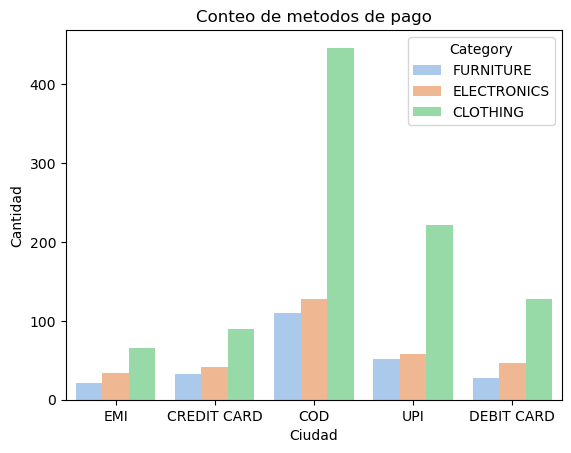

In [27]:
# Crear el gráfico de barras con seaborn
sns.countplot(x='PaymentMode', data=df_consolidado_orders,palette='pastel', hue='Category')

# Agregar títulos y etiquetas
plt.title('Conteo de metodos de pago')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

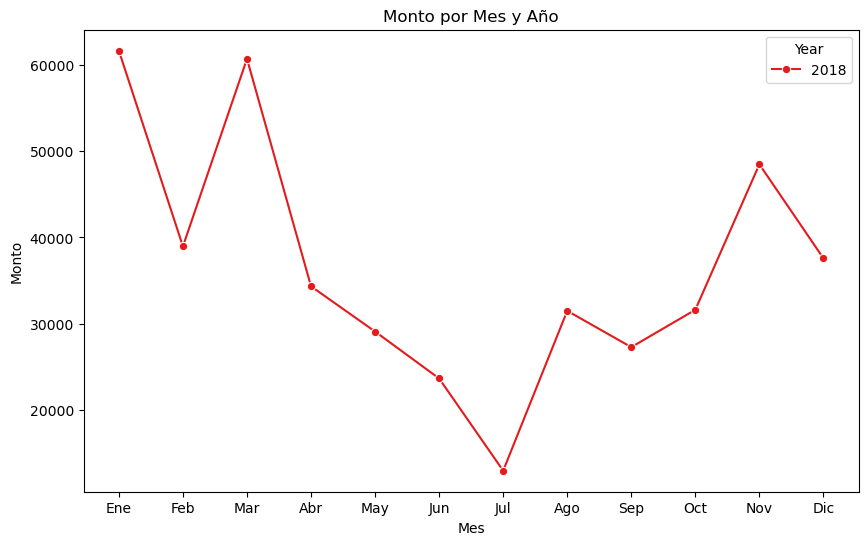

In [28]:
# Agrupar por año y mes y sumar el moonto
monto_por_mes_año = df_consolidado_orders.groupby(['Year', 'Month'])['Amount'].sum().reset_index(name='Monto total')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Monto total', hue='Year', data=monto_por_mes_año, marker='o', palette='Set1')

# Agregar títulos y etiquetas
plt.title('Monto por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Monto')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

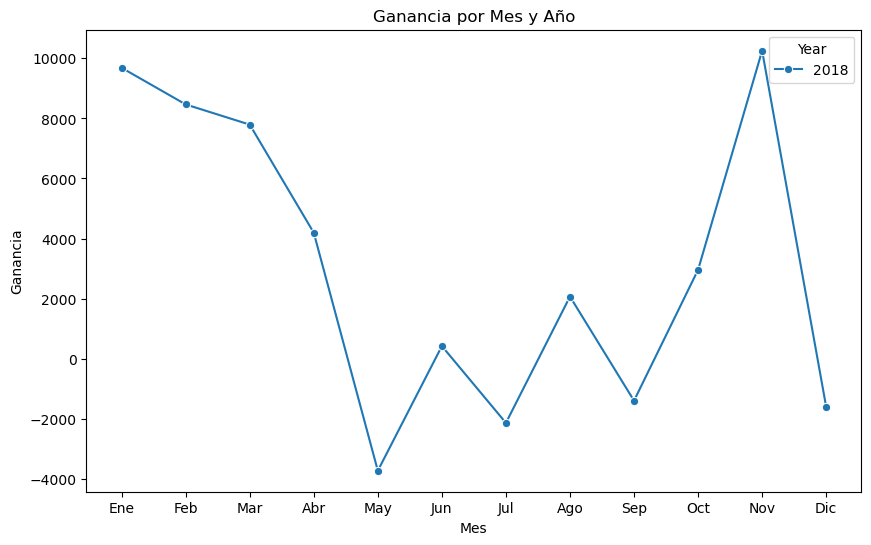

In [29]:
# Agrupar por año y mes y sumar la Ganancia
ganancia_por_mes_año = df_consolidado_orders.groupby(['Year', 'Month'])['Profit'].sum().reset_index(name='Ganancia total')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Ganancia total', hue='Year', data=ganancia_por_mes_año, marker='o', palette='tab10')

# Agregar títulos y etiquetas
plt.title('Ganancia por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

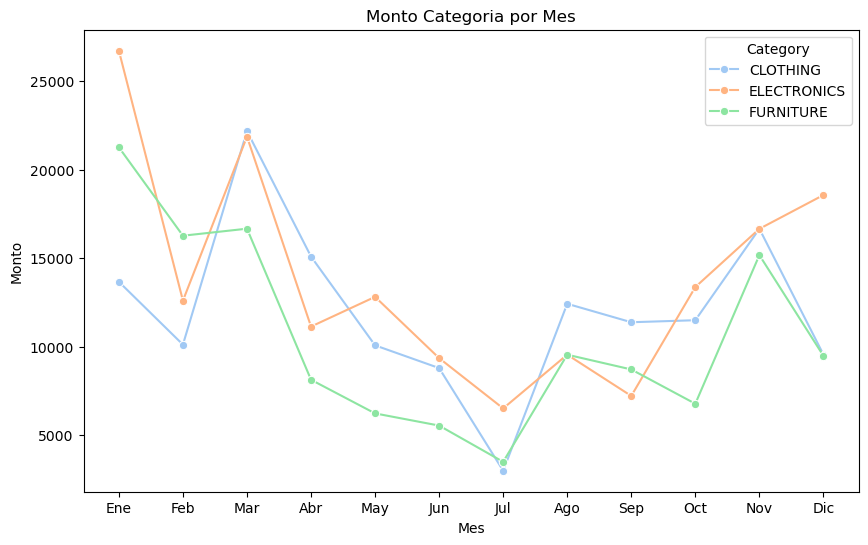

In [30]:
# Agrupar por Cayegoria y mes y sumar el Monto
categoria_por_mes= df_consolidado_orders.groupby(['Category', 'Month'])['Amount'].sum().reset_index(name='Categoria total')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Categoria total', hue='Category', data=categoria_por_mes, marker='o', palette='pastel')

# Agregar títulos y etiquetas
plt.title('Monto Categoria por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

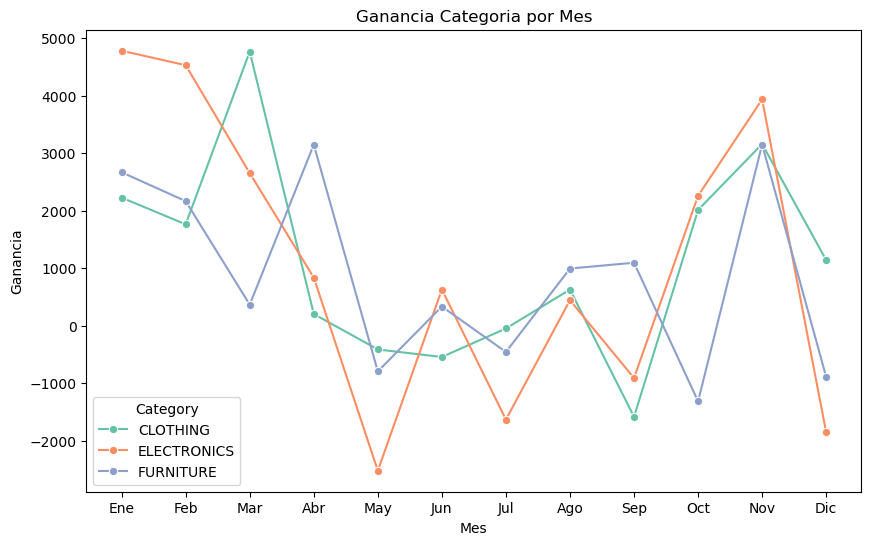

In [31]:
# Agrupar por Cayegoria y mes y sumar el Monto
categoria_por_mes= df_consolidado_orders.groupby(['Category', 'Month'])['Profit'].sum().reset_index(name='Categoria total')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Categoria total', hue='Category', data=categoria_por_mes, marker='o', palette='Set2')

# Agregar títulos y etiquetas
plt.title('Ganancia Categoria por Mes')
plt.xlabel('Mes')
plt.ylabel('Ganancia')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

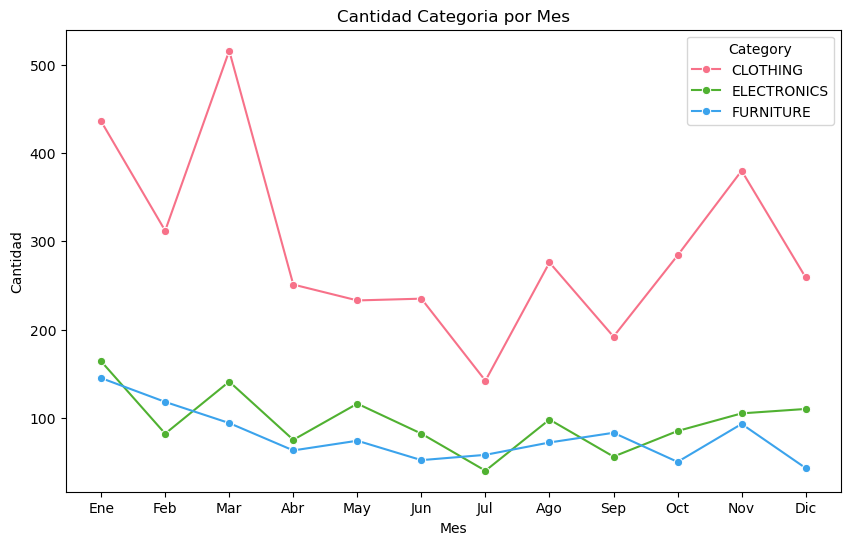

In [32]:
# Agrupar por Categoria, mes y suma de Cantidad
categoria_por_mes= df_consolidado_orders.groupby(['Category', 'Month'])['Quantity'].sum().reset_index(name='Categoria total')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Categoria total', hue='Category', data=categoria_por_mes, marker='o', palette='husl')

# Agregar títulos y etiquetas
plt.title('Cantidad Categoria por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

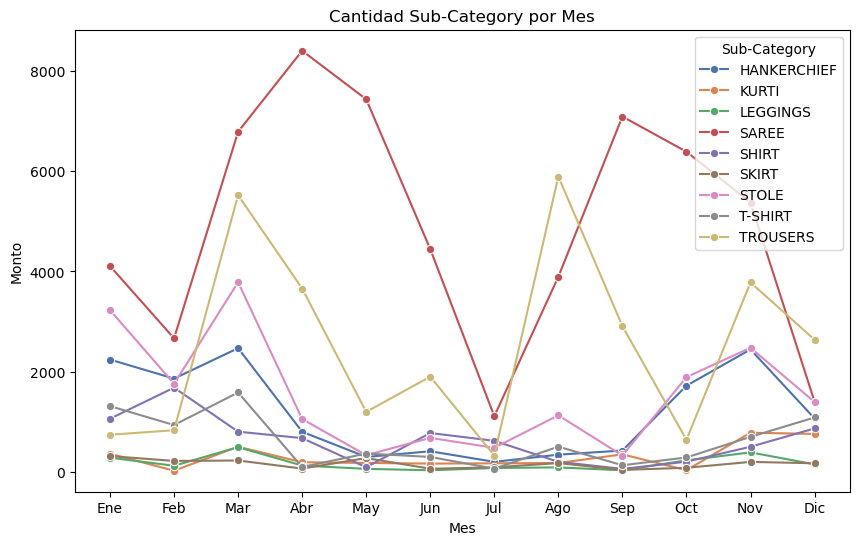

In [34]:
dfconsolidadoropa= df_consolidado_orders[df_consolidado_orders['Category']=='CLOTHING']
categoria_por_mes= dfconsolidadoropa.groupby(['Sub-Category', 'Month'])['Amount'].sum().reset_index(name='Categoria total')
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Categoria total', hue='Sub-Category', data=categoria_por_mes, marker='o', palette='deep')

# Agregar títulos y etiquetas
plt.title('Cantidad Sub-Category por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.show()

## Conclusiones

Observamos que la informacion esta del año 2018, su comportamiento a nivel de del monto se observan que en los meses que menos hubo ordenes, hubo perdidas en espécial en el mes de mayo,pero importante a revisar es que si miramos los datos por categoria, observamos que en ropa se vende gran cantidad, pero aun asi a nivel de monto son muy parejos con los demas categorias, electronica presenta las perdidas mas grandes pero su comportamiento a nivel de monto pensar que es un buen negocio la venta de electrodomesticos